In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [37]:
df_1 = pd.read_csv('train.csv')
df_2 = pd.read_csv('test.csv')
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1, df_2], axis=0)
df = df.set_index('Id')

In [38]:
# Display the number of null values in each column
df.isna().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [39]:
# Extract the columns with null values
df_null = df[df.isnull().sum()[df.isnull().sum() > 0].index]

In [40]:
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


<Axes: ylabel='Id'>

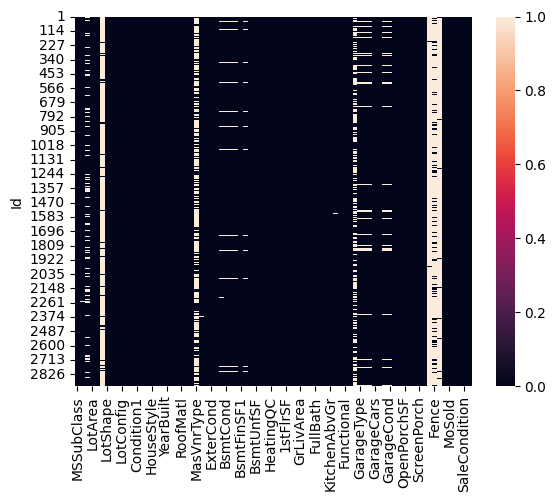

In [41]:
sns.heatmap(df.isnull())

In [42]:
df_objects = df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis=1)

In [43]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis=1)
df_objects = df_objects.fillna('Null')
df_objects_encoded = pd.get_dummies(df_objects)
df_objects.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [44]:
# Display the value counts for the 'Utilities' column
df_objects['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Null          4
Name: count, dtype: int64

In [45]:
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_Null,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Null,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,False,True,False,False,True,True,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,True,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
5,False,False,False,False,True,False,False,True,True,False,...,False,False,False,True,False,False,False,False,True,False


In [35]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis=1)
        print(i)

In [46]:
new_df = pd.concat([df, df_objects_encoded], axis=1)

In [47]:
len(new_df.columns)

321

In [48]:
len(df.columns), len(df_objects_encoded.columns)

(74, 247)

In [49]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis=1)
new_df.isna().sum()[new_df.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [50]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])
for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))
new_df.isna().sum()[new_df.isna().sum() > 0]

Series([], dtype: int64)

In [58]:
training_data = new_df[0:len(df_1)]
testing_data = new_df[len(df_1):]

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [59]:
x = training_data
y = training_data['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))
X_train.shape, Y_train.shape

((1168, 284), (1168, 1))

In [60]:
model_1 = LinearRegression()
model_1.fit(x, y)
y_pred = model_1.predict(X_test)
mean_squared_error(Y_test, y_pred)

5.2228863751074236e-21

In [61]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42)
model_2.fit(x, y)
y_pred = model_2.predict(X_test)
mean_squared_error(Y_test, y_pred)


153595.21875

In [62]:
model_3 = RandomForestRegressor(n_estimators=100)
model_3.fit(x, y)
y_pred = model_3.predict(X_test)
mean_squared_error(Y_test, y_pred)

881309.6842691789

In [63]:
pred = model_2.predict(testing_data)

final_df = pd.DataFrame()
final_df['Id'] = testing_data.index
final_df['SalePrice'] = pred

# Write the final DataFrame to a CSV file without index
final_df.to_csv('output.csv', index=False)